## Import Necessary Libraries

In [18]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data Preprocessing

In [2]:
def load_data(data_dir):
    """
    Load images and labels from the dataset directory.

    Args:
    - data_dir (str): Path to the dataset directory.

    Returns:
    - images (list): List of flattened images.
    - labels (list): List of label names.
    - label_ids (list): List of label IDs.
    """
    
    # List all the labels in the dataset directory
    labels = os.listdir(data_dir)

    # Initialize lists to store images and labels
    images = []
    label_ids = []

    # Load images and labels
    for label_id, label in enumerate(labels):
        label_path = os.path.join(data_dir, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            # Read and resize the image
            image = imread(image_path)
            image = resize(image, (224, 224, 3))
            images.append(image.flatten())  # Flatten the image and append to the list
            label_ids.append(label_id)
    return images, labels, label_ids


## Training - StratifiedKFold + RFClassifier

In [3]:
def train(X_train_full, y_train_full):
    """
    Train a Random Forest classifier using stratified k-fold cross-validation.

    Args:
    - X_train_full (numpy.ndarray): Array of training data features.
    - y_train_full (numpy.ndarray): Array of training data labels.

    Returns:
    - rf_classifier_skf (RandomForestClassifier): Trained Random Forest classifier.
    - val_accuracies (list): List of validation accuracies for each fold.
    """
    
    # Initialize the Random Forest classifier with n_estimators=20
    rf_classifier_skf = RandomForestClassifier(n_estimators=20, random_state=42)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform cross-validation
    val_accuracies = []
    for train_index, test_index in skf.split(X_train_full, y_train_full):
        X_train, X_val = X_train_full[train_index], X_train_full[test_index]
        y_train, y_val = y_train_full[train_index], y_train_full[test_index]
        
        # Train the classifier
        rf_classifier_skf.fit(X_train, y_train)
        
        # Make predictions on the validation set
        y_pred_val = rf_classifier_skf.predict(X_val)
        
        # Calculate accuracy
        val_accuracy = accuracy_score(y_val, y_pred_val)
        val_accuracies.append(val_accuracy)
    
    return rf_classifier_skf, val_accuracies


# Evaluations

In [4]:
def confusion_matrix_f(y_test, y_pred_test):
    """
    Generate and plot the confusion matrix.

    Args:
    - y_test (numpy.ndarray): True labels.
    - y_pred_test (numpy.ndarray): Predicted labels.
    - labels (list): List of label names.

    Returns:
    - None
    """
    
    # Generate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    # Generate confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [5]:
def display_results(X_test, y_test, y_pred_test, labels):
    """
    Display some test images with predicted and true labels.

    Args:
    - X_test (numpy.ndarray): Array of test images.
    - y_test (numpy.ndarray): True labels of the test images.
    - y_pred_test (numpy.ndarray): Predicted labels of the test images.
    - labels (list): List of label names.

    Returns:
    - None
    """
    
    # Display some test images with predicted and true labels
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Adjust the number of images to display
        index = random.randint(0, len(X_test) - 1)
        plt.subplot(3, 3, i + 1)
        plt.imshow(X_test[index].reshape(224, 224, 3))
        plt.axis('off')
        plt.title(f"True: {labels[y_test[index]]}\nPredicted: {labels[y_pred_test[index]]}")
    plt.show()

## Main functions

In [8]:
images, labels, label_ids = load_data(data_dir='data/WoundDataset/train')

In [9]:
# Convert lists to numpy arrays
X_train_full = np.array(images)
y_train_full = np.array(label_ids)

In [10]:
# # Split the dataset into training and testing sets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
rf_classifier_skf, val_accuracies = train(X_train_full, y_train_full)

In [12]:
# Calculate and print the mean accuracy
mean_accuracy = np.mean(val_accuracies)
print("Mean Accuracy on Validation dataset:", mean_accuracy)

Mean Accuracy on Validation dataset: 0.4834624218054914


## Test Set

In [13]:
test_images, _, test_label_ids = load_data(data_dir='data/WoundDataset/test')

In [14]:
# Convert lists to numpy arrays
X_test = np.array(test_images)
y_test = np.array(test_label_ids)

In [15]:
# Make predictions on the test set
y_pred_test = rf_classifier_skf.predict(X_test)

Test Accuracy: 0.5205992509363296


In [21]:

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)

# Compute precision
precision = precision_score(y_test, y_pred_test, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred_test, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print("Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5205992509363296
Precision: 0.5274794117694961
Recall: 0.5205992509363296
F1 Score: 0.5058021118672817


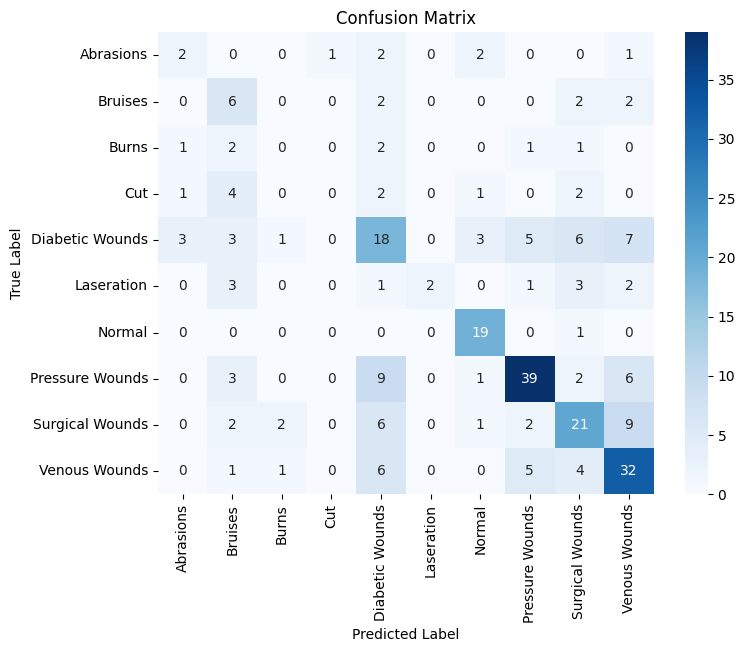

In [16]:
confusion_matrix_f(y_test, y_pred_test)

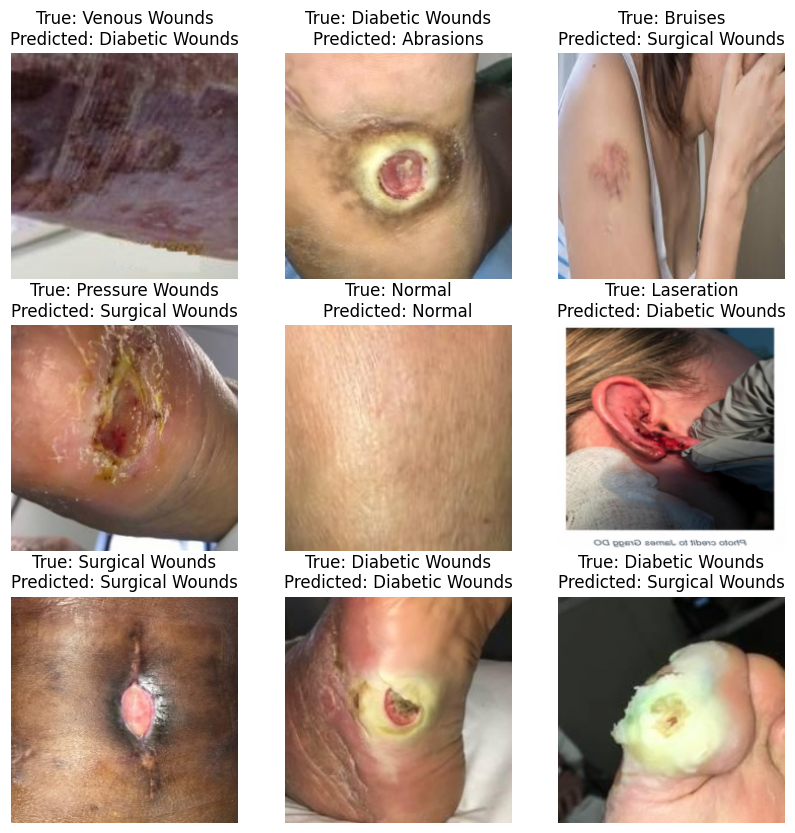

In [17]:
display_results(X_test, y_test, y_pred_test, labels)